In [239]:
import pandas as pd

In [312]:
# recompute tresholds for when gaze is on one of the character (standard/exact box should be 40):
def recompute_treshold(df, thresh):
    df.loc[(df["gaze_to_human"] > thresh) & (df["gaze_to_ai"] > thresh),"Gaze_focus"] = "Env"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] > thresh),"Gaze_focus"] = "Human"
    df.loc[(df["gaze_to_human"] > thresh) & (df["gaze_to_ai"] < thresh),"Gaze_focus"] = "AI"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] < thresh) & (df["gaze_to_human"] < df["gaze_to_ai"]),"Gaze_focus"] = "Human"
    df.loc[(df["gaze_to_human"] < thresh) & (df["gaze_to_ai"] < thresh) & (df["gaze_to_human"] > df["gaze_to_ai"]),"Gaze_focus"] = "AI"
    return df

In [364]:
# read in merged csvs
threshold = 60
path = "gaze_agent_merged/"
data = {}

for i in range(1,6):
    if i not in [11, 24, 26, 32, 34]:
        if i<10:
            participant="P0"+str(i)
        else:
            participant="P"+str(i)
            data[participant]={}
        # add dict entry
        data[participant]={}
        
        data[participant]["000"]=recompute_treshold(pd.read_csv(path+participant+"_000_merged.csv", sep=";"), threshold)
        data[participant]["001"]=recompute_treshold(pd.read_csv(path+participant+"_001_merged.csv", sep=";"), threshold)
    

In [365]:
# check if all 30 are read in
print(len(data), "files were loaded")

5 files were loaded


In [366]:
# sanity check
data["P01"]["001"].head()

,Unnamed: 0,norm_pos_x,norm_pos_y,Human x,Human y,Agent x,Agent y,Frame number,gaze_to_human,gaze_to_ai,Gaze_focus,Condition
0,17,647.758690,193.043993,734.0,329,589.0,330,17,161.001861,149.028626,Env,Confusion
1,18,488.885407,397.716899,734.0,329,642.5,320,18,254.564679,172.155045,Env,Confusion
2,19,491.247234,394.674239,733.5,329,654.0,320,19,250.997029,179.066203,Env,Confusion
3,20,484.855397,406.854818,734.0,328,658.0,320,20,261.325689,193.708061,Env,Confusion
4,21,659.274050,347.087902,735.0,327,659.5,318,21,78.345028,29.088779,AI,Confusion


# Frame Counts 

In [367]:
counters={"lvl1":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}},
          "lvl2":{"Gaze":{"AI":0, "Human":0, "Env":0}, 
                  "Condition":{"Error":0, "Confusion":0, "Normal":0}}
         }


In [368]:
for p in data:
    print(p)
    # add counts for lvl1
    counters["lvl1"]["Gaze"]["AI"]+=(data[p]["000"].Gaze_focus == 'AI').sum()
    counters["lvl1"]["Gaze"]["Human"]+=(data[p]["000"].Gaze_focus == 'Human').sum()
    counters["lvl1"]["Gaze"]["Env"]+=(data[p]["000"].Gaze_focus == 'Env').sum()
    counters["lvl1"]["Condition"]["Error"]+=(data[p]["000"].Condition == 'Error').sum()
    counters["lvl1"]["Condition"]["Confusion"]+=(data[p]["000"].Condition == 'Confusion').sum()
    counters["lvl1"]["Condition"]["Normal"]+=(data[p]["000"].Condition == 'Normal').sum()
    
    # add counts for lvl2
    counters["lvl2"]["Gaze"]["AI"]+=(data[p]["001"].Gaze_focus == 'AI').sum()
    counters["lvl2"]["Gaze"]["Human"]+=(data[p]["001"].Gaze_focus == 'Human').sum()
    counters["lvl2"]["Gaze"]["Env"]+=(data[p]["001"].Gaze_focus == 'Env').sum()
    counters["lvl2"]["Condition"]["Error"]+=(data[p]["001"].Condition == 'Error').sum()
    counters["lvl2"]["Condition"]["Confusion"]+=(data[p]["001"].Condition == 'Confusion').sum()
    counters["lvl2"]["Condition"]["Normal"]+=(data[p]["001"].Condition == 'Normal').sum()
    
counters    

P01
P02
P03
P04
P05


{'lvl1': {'Gaze': {'AI': 198, 'Human': 1918, 'Env': 2919},
  'Condition': {'Error': 277, 'Confusion': 2744, 'Normal': 2014}},
 'lvl2': {'Gaze': {'AI': 494, 'Human': 2106, 'Env': 2210},
  'Condition': {'Error': 366, 'Confusion': 364, 'Normal': 4080}}}

In [369]:
#counters={"lvl1":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}},
#          "lvl2":{"Gaze":{"AI":[], "Human":[], "Env":[]}, 
#                  "Condition":{"Error":[], "Confusion":[], "Normal":[]}}
#         }
#
#for p in data:
#    print(p)
#    # add counts for lvl1
#    counters["lvl1"]["Gaze"]["AI"].append((data[p]["000"].Gaze_focus == 'AI').sum())
#    counters["lvl1"]["Gaze"]["Human"].append((data[p]["000"].Gaze_focus == 'Human').sum())
#    counters["lvl1"]["Gaze"]["Env"].append((data[p]["000"].Gaze_focus == 'Env').sum())
#    counters["lvl1"]["Condition"]["Error"].append((data[p]["000"].Condition == 'Error').sum())
#    counters["lvl1"]["Condition"]["Confusion"].append((data[p]["000"].Condition == 'Confusion').sum())
#    counters["lvl1"]["Condition"]["Normal"].append((data[p]["000"].Condition == 'Normal').sum())
#    
#    # add counts for lvl2
#    counters["lvl2"]["Gaze"]["AI"].append((data[p]["001"].Gaze_focus == 'AI').sum())
#    counters["lvl2"]["Gaze"]["Human"].append((data[p]["001"].Gaze_focus == 'Human').sum())
#    counters["lvl2"]["Gaze"]["Env"].append((data[p]["001"].Gaze_focus == 'Env').sum())
#    counters["lvl2"]["Condition"]["Error"].append((data[p]["001"].Condition == 'Error').sum())
#    counters["lvl2"]["Condition"]["Confusion"].append((data[p]["001"].Condition == 'Confusion').sum())
#    counters["lvl2"]["Condition"]["Normal"].append((data[p]["001"].Condition == 'Normal').sum())
#    
#counters    

# Compute AoI Analysis for the 3 conditions

In [370]:
# for each particpant compute the percentage looked at agent/human/env for the different conditions conf/err/bau
for p in data:
    print(p)
    # compute stats
    data[p]["stats"]={}
    lvls_concatenated=pd.concat([data[p]["000"], data[p]["001"]], ignore_index=True, sort=False)
    data[p]["stats"]["overall"]=lvls_concatenated.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl1"]=data[p]["000"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)
    data[p]["stats"]["lvl2"]=data[p]["001"].groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)

P01
P02
P03
P04
P05


<AxesSubplot:xlabel='Condition'>

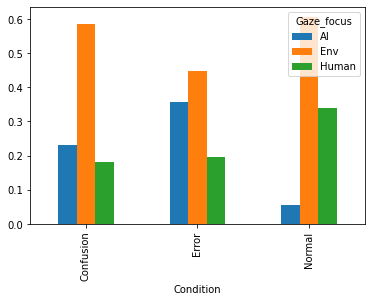

In [371]:
# plot that data for a single sample
data["P02"]["stats"]["lvl2"].plot(kind="bar")

In [372]:
# plot that data averaged over all
list_of_stats=[]
list_of_stats_lvl1=[]
list_of_stats_lvl2=[]
for p in data:
    list_of_stats.append(data[p]["stats"]["overall"])
    list_of_stats_lvl1.append(data[p]["stats"]["lvl1"])
    list_of_stats_lvl2.append(data[p]["stats"]["lvl2"])
list_of_stats

[Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.054674  0.552028  0.393298
 Error       0.081481  0.348148  0.570370
 Normal      0.080778  0.414361  0.504862,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.071776  0.740876  0.187348
 Error       0.356322  0.448276  0.195402
 Normal      0.098299  0.591682  0.310019,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.021205  0.446429  0.532366
 Error       0.185714  0.228571  0.585714
 Normal      0.113295  0.211561  0.675145,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.054201  0.804878  0.140921
 Error       0.020979  0.916084  0.062937
 Normal      0.049296  0.760563  0.190141,
 Gaze_focus        AI       Env     Human
 Condition                               
 Confusion   0.066079  0.460352  0.473568
 Error       0.024038  0.38942

In [373]:
stats_overall_concat=pd.concat(list_of_stats)
stats_lvl1_concat=pd.concat(list_of_stats_lvl1)
stats_lvl2_concat=pd.concat(list_of_stats_lvl2)
stats_overall_concat

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.054674,0.552028,0.393298
Error,0.081481,0.348148,0.570370
Normal,0.080778,0.414361,0.504862
Confusion,0.071776,0.740876,0.187348
Error,0.356322,0.448276,0.195402
Normal,0.098299,0.591682,0.310019
Confusion,0.021205,0.446429,0.532366
Error,0.185714,0.228571,0.585714
Normal,0.113295,0.211561,0.675145


In [374]:
by_row_index = stats_overall_concat.groupby(stats_overall_concat.index)
df_means_overall = by_row_index.mean()
df_std_overall = by_row_index.std()
print(df_means_overall)
print(df_std_overall)

Gaze_focus        AI       Env     Human
Condition                               
Confusion   0.053587  0.600913  0.345500
Error       0.133707  0.466100  0.400192
Normal      0.081384  0.464187  0.454429
Gaze_focus        AI       Env     Human
Condition                               
Confusion   0.019602  0.163710  0.173544
Error       0.141178  0.264109  0.251885
Normal      0.025469  0.215139  0.200550


<AxesSubplot:xlabel='Condition'>

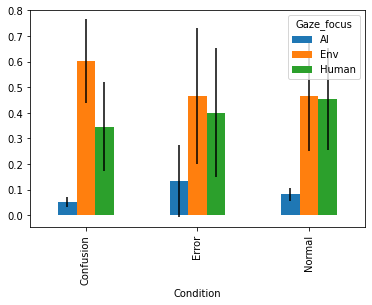

In [375]:
# plot averaged for all participants
df_means_overall.plot(kind="bar", yerr=df_std_overall)

<AxesSubplot:xlabel='Condition'>

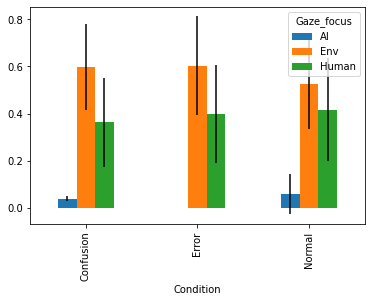

In [376]:
# plot that data averaged over lvl1 
by_row_index_lvl1 = stats_lvl1_concat.groupby(stats_lvl1_concat.index)
df_means_lvl1 = by_row_index_lvl1.mean()
df_std_lvl1 = by_row_index_lvl1.std()
df_means_lvl1.plot(kind="bar", yerr=df_std_lvl1)

<AxesSubplot:xlabel='Condition'>

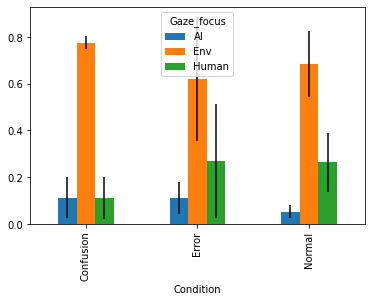

In [351]:
# plot that data averaged over lvl2 
by_row_index_lvl2 = stats_lvl2_concat.groupby(stats_lvl2_concat.index)
df_means_lvl2 = by_row_index_lvl2.mean()
df_std_lvl2 = by_row_index_lvl2.std()
df_means_lvl2.plot(kind="bar", yerr=df_std_lvl2)

# Export for SPSS



In [282]:
participants=[]
workflow_ai=[]
workflow_human=[]
workflow_env=[]
conf_ai=[]
conf_human=[]
conf_env=[]
err_ai=[]
err_human=[]
err_env=[]

In [283]:
data["P04"]["stats"]["overall"]

Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.043360,0.869919,0.086721
Error,0.013986,0.958042,0.027972
Normal,0.031370,0.882843,0.085787


In [285]:
data["P04"]["stats"]["overall"]["AI"]["Confusion"]

0.04336043360433604

In [185]:
for p in data:
    participants.append(p)
    stats_overall=data["P04"]["stats"]["overall"]
    
    workflow_ai.append(stats_overall["AI"]["Normal"])
    workflow_human.append(stats_overall["Human"]["Normal"])
    workflow_env.append(stats_overall["Env"]["Normal"])
    
    conf_ai.append(stats_overall["AI"]["Confusion"])
    conf_human.append(stats_overall["Human"]["Confusion"])
    conf_env.append(stats_overall["Env"]["Confusion"])
    
    err_ai.append(stats_overall["AI"]["Error"])
    err_human.append(stats_overall["Human"]["Error"])
    err_env.append(stats_overall["Env"]["Error"])
    

KeyError: 'Normal'

In [177]:
# export collected data to csv for analysis in spss
spss_data = {'participant_id': participants, 
             'Workflow_AI': workflow_ai, 'Workflow_Human': workflow_human, 'Workflow_Env': workflow_env, 
             'Conf_AI': conf_ai, 'Conf_Human': conf_human, 'Conf_Env': conf_env,
             'Err_AI': err_ai, 'Err_Human': err_human, 'Err_Env': err_env,}
spss_df = pd.DataFrame(data=spss_data)
#spss_df.to_csv(index=False, "data_for_spss")

In [178]:
spss_df

,participant_id,Workflow_AI,Workflow_Human,Workflow_Env,Conf_AI,Conf_Human,Conf_Env,Err_AI,Err_Human,Err_Env


# Old test

In [32]:
test=data["P02"]["001"]

In [52]:
test["Condition"][0:30]="Confusion"

<ipython-input-52-dcbf52a0e5a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Condition"][0:30]="Confusion"


In [53]:
test.head()

,Unnamed: 0,norm_pos_x,norm_pos_y,Human x,Human y,Agent x,Agent y,Frame number,gaze_to_human,gaze_to_ai,Gaze_focus,Condition
0,0,579.062810,299.030757,624.5,365,481.0,222,0,80.102929,124.699849,Env,Confusion
1,1,577.224428,339.964374,624.0,364,480.5,220,1,52.589594,154.100831,Env,Confusion
2,2,600.289828,403.841444,624.5,364,482.0,220,2,46.620522,218.609606,Env,Confusion
3,3,600.842422,403.534150,624.5,364,482.0,220,3,46.072009,218.651105,Env,Confusion
4,4,590.888894,407.877364,624.5,364,482.0,220,4,55.271417,217.151318,Env,Confusion


In [57]:
test.groupby("Condition")["Gaze_focus"].value_counts()

Condition  Gaze_focus
Confusion  Env            22
           Human           7
           AI              1
TODO       Env           909
           AI             74
Name: Gaze_focus, dtype: int64

In [87]:
test.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().fillna(0)


Gaze_focus,AI,Env,Human
Condition,,,
Confusion,0.033333,0.733333,0.233333
TODO,0.075280,0.924720,0.000000


<AxesSubplot:xlabel='Condition'>

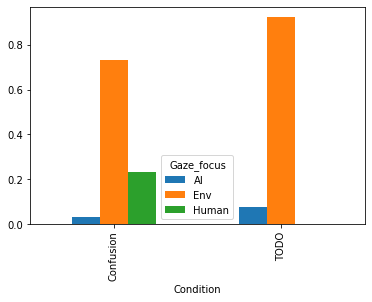

In [188]:
test.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().plot(kind="bar")

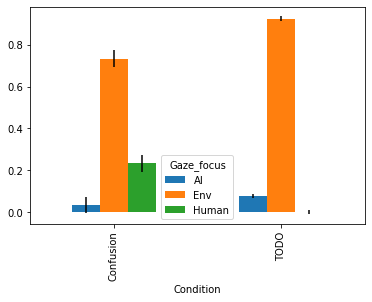

In [203]:
a = test.groupby("Condition")["Gaze_focus"].value_counts(normalize=True).unstack().plot(kind="bar", yerr=[0.04,0.01])